<a href="https://colab.research.google.com/github/MasoudMoeini/Image-blur-detection/blob/main/image_blur_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext tensorboard
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib . pyplot as plt
from tensorflow.keras import layers, losses
# Base CNN
x = tf.placeholder(tf.float32, (None,224, 224, 3))
y = tf.placeholder(tf.float32, (None,224, 224, 3))


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#!unzip -qq BlurDatasetResultShi.zip
#!unzip -qq ccv_data.zip

In [2]:
rm -rf ./logs/

In [42]:
# Conv1
# Input Tensor Shape: [batch_size, 224, 224, 3]
# Output Tensor Shape: [batch_size, 224, 224, 32]
conv1 = tf.layers.conv2d(x, filters=32, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

# conv2
# Input Tensor Shape: [batch_size, 224, 224, 32]
# Output Tensor Shape: [batch_size, 224, 224, 32]
conv2 = tf.layers.conv2d(conv1, filters=32, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

# pool1
# Input Tensor Shape: [batch_size, 224, 224, 32]
# Output Tensor Shape: [batch_size, 112, 112, 32]
pool1 = tf.layers.max_pooling2d(conv2, pool_size=[2,2], strides=2, padding="same")

#conv3
# Input Tensor Shape: [batch_size, 112, 112, 32]
# Output Tensor Shape: [batch_size, 112, 112, 64]
conv3 = tf.layers.conv2d(pool1, filters=64, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#conv4
# Input Tensor Shape: [batch_size, 112, 112, 64]
# Output Tensor Shape: [batch_size, 112, 112, 64]
conv4 = tf.layers.conv2d(conv3, filters=64, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#pool2
# Input Tensor Shape: [batch_size, 112, 112, 64]
# Output Tensor Shape: [batch_size, 56, 56, 64]
pool2 = tf.layers.max_pooling2d(conv4, pool_size=[2,2], strides=2, padding="same")

#conv5
# Input Tensor Shape: [batch_size, 56, 56, 64]
# Output Tensor Shape: [batch_size, 56, 56, 128]
conv5 = tf.layers.conv2d(pool2, filters=128, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#conv6
# Input Tensor Shape: [batch_size, 56, 56, 128]
# Output Tensor Shape: [batch_size, 56, 56, 128]
conv6 = tf.layers.conv2d(conv5, filters=128, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#pool3
# Input Tensor Shape: [batch_size, 56, 56, 128]
# Output Tensor Shape: [batch_size, 28, 28, 128]
pool3 = tf.layers.max_pooling2d(conv6, pool_size=[2,2], strides=2, padding="same")

#conv7
# Input Tensor Shape: [batch_size, 28, 28, 128]
# Output Tensor Shape: [batch_size, 28, 28, 256]
conv7 = tf.layers.conv2d(pool3, filters=256, kernel_size=[3,3], padding="same", activation=tf.nn.relu)
#conv8
# Input Tensor Shape: [batch_size, 28, 28, 256]
# Output Tensor Shape: [batch_size, 28, 28, 256]
conv8 = tf.layers.conv2d(conv7, filters=256, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#pool4
# Input Tensor Shape: [batch_size, 28, 28, 256]
# Output Tensor Shape: [batch_size, 14, 14, 256]

pool4 = tf.layers.max_pooling2d(conv8, pool_size=[2,2], strides=2, padding="same")
#conv9
# Input Tensor Shape: [batch_size, 14, 14, 256]
# Output Tensor Shape: [batch_size, 14, 14, 512]
conv9 = tf.layers.conv2d(pool4, filters=512, kernel_size=[3,3], padding="same", activation=tf.nn.relu)

#pool5
# Input Tensor Shape: [batch_size, 14, 14, 512]
# Output Tensor Shape: [batch_size, 7, 7, 512]
pool5 = tf.layers.max_pooling2d(conv9, pool_size=[2,2], strides=2, padding="same")

#------------------------------------------decode---------------------------------------


#dim = int(np.prod(pool5.get_shape()[1:])) #7*7*512
#fcl = tf.reshape(pool5, shape=[-1, dim], name ='fc1')#[batch_size,7*7*512]
# decoder

# Input Tensor Shape: [batch_size, 7, 7, 512]
# Output Tensor Shape: [batch_size, 14, 14, 512]
net=tf.layers.conv2d_transpose(pool5,512,[3, 3],strides = 2,padding='SAME')

# Input Tensor Shape: [batch_size, 14, 14, 512]
# Output Tensor Shape: [batch_size, 28, 28, 256]
net=tf.layers.conv2d_transpose(net,256,[3, 3],strides = 2,padding='SAME')

# Input Tensor Shape: [batch_size, 28, 28, 256]
# Output Tensor Shape: [batch_size, 56, 56, 128]
net=tf.layers.conv2d_transpose(net,128,[3, 3],strides = 2,padding='SAME')

# Input Tensor Shape: [batch_size, 56, 56, 128]
# Output Tensor Shape: [batch_size, 112, 112, 128]
net=tf.layers.conv2d_transpose(net,128,[3, 3],strides = 2,padding='SAME',activation = tf.nn.tanh)

# Input Tensor Shape: [batch_size, 112, 112, 128]
# Output Tensor Shape: [batch_size, 224, 224, 64]
net=tf.layers.conv2d_transpose(net,64,[3, 3],strides = 2,padding='SAME',activation = tf.nn.tanh)

# Input Tensor Shape: [batch_size, 224, 224, 64]
# Output Tensor Shape: [batch_size, 224, 224, 32]
net=tf.layers.conv2d_transpose(net,32,[3, 3],strides = 1,padding='SAME',activation = tf.nn.tanh)

# Input Tensor Shape: [batch_size, 224, 224, 32]
# Output Tensor Shape: [batch_size, 224, 224, 16]
net=tf.layers.conv2d_transpose(net,16,[3, 3],strides = 1, padding='SAME', activation = tf.nn.tanh)

# Input Tensor Shape: [batch_size, 224, 224, 16]
# Output Tensor Shape: [batch_size, 224, 224, 3]
net=tf.layers.conv2d_transpose(net,3,[3, 3],strides = 1, padding='SAME', activation = tf.nn.tanh)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:575: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/pooling.py:600: UserWarni

In [20]:
#normlizing output
#wmax = tf.reduce_max(net, axis=2, keepdims=True) # along width dimension
#output_max = tf.reduce_max(wmax, axis=1, keepdims=True) # along height dimension
#normalized_output = net / output_max
#alpha = 1.1
#loss = tf.reduce_mean( tf.square( (1.0/(alpha - y)) * (normalized_output - y) ))


In [21]:
!unzip -qq train.zip


replace train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [32]:
from datareader import DataReader
train_images = DataReader('train')


In [46]:
## Optimize
batch_size=20
num_batches= train_images.num_batches_of_size(batch_size)
learning_rate = 0.0002
n_epochs = 100
loss = tf.reduce_mean(tf.square(net - y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize(loss)

In [47]:
init = tf.global_variables_initializer()
epochs_average_loss=[]
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        print('epoch ',epoch)
        LOSS=[]
        for i in range(num_batches):
          images, blur, _ = train_images.get_batch(batch_size)
          batch_loss = sess.run([loss, train], feed_dict={x: images, y: blur})
          LOSS.append(batch_loss[0])
          print('epoch {} batch number {}    batch loss: {}'.format(epoch, i ,batch_loss[0]))
        mean_epoch_Losses=np.mean(LOSS)
        epochs_average_loss.append(mean_epoch_Losses)
        print(' Average epoch losses: {} '.format(mean_epoch_Losses))
       

Streaming output truncated to the last 5000 lines.
epoch 3 batch number 42    batch loss: 0.1306014060974121
epoch 3 batch number 43    batch loss: 0.13610149919986725
epoch 3 batch number 44    batch loss: 0.1253252923488617
epoch 3 batch number 45    batch loss: 0.13818421959877014
epoch 3 batch number 46    batch loss: 0.127253919839859
epoch 3 batch number 47    batch loss: 0.15951932966709137
epoch 3 batch number 48    batch loss: 0.11673153191804886
epoch 3 batch number 49    batch loss: 0.128305122256279
 Average epoch losses: 0.13263142108917236 
epoch  4
epoch 4 batch number 0    batch loss: 0.1321297436952591
epoch 4 batch number 1    batch loss: 0.1198902577161789
epoch 4 batch number 2    batch loss: 0.12468647956848145
epoch 4 batch number 3    batch loss: 0.14403416216373444
epoch 4 batch number 4    batch loss: 0.11644934862852097
epoch 4 batch number 5    batch loss: 0.12179328501224518
epoch 4 batch number 6    batch loss: 0.11260392516851425
epoch 4 batch number 7    

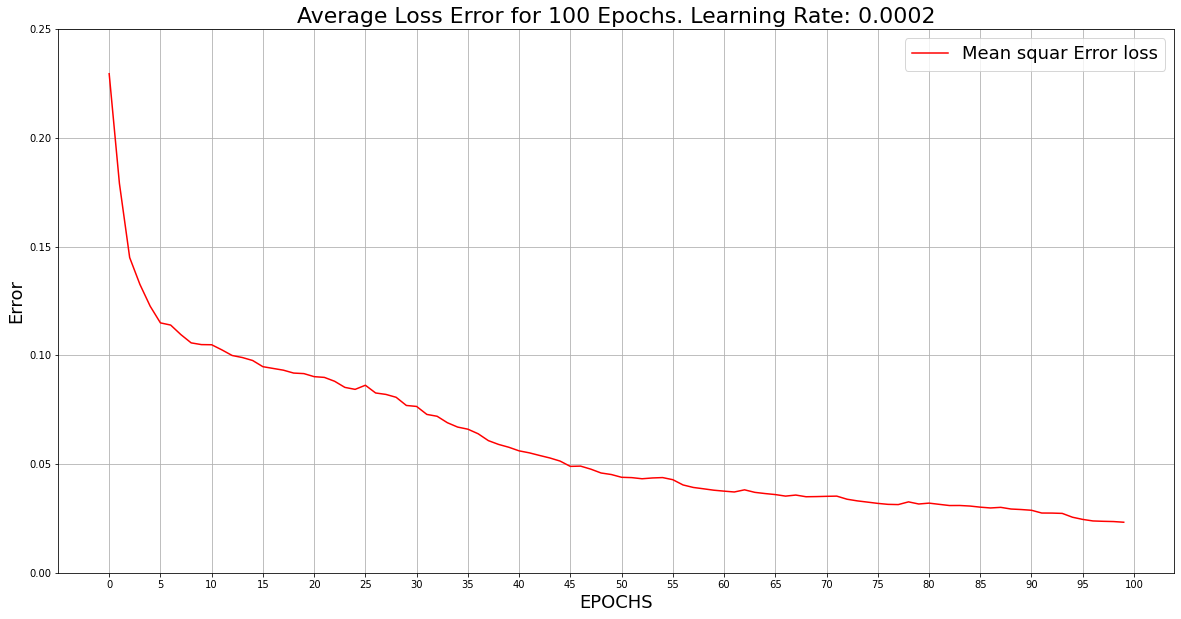

In [53]:
t=np.arange(0,n_epochs,1)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title('Average Loss Error for {} Epochs. Learning Rate: {}'.format(n_epochs,learning_rate),fontsize=22)
plt.plot(t,epochs_average_loss,color='r',label='Mean squar Error loss')
#plt.plot(t,Gaverageloss,color='r',label='Generator Overal Error Gloss')
#plt.plot(t,ADVloss,color='g',label='Gnerator Adversarial Error G_Adv')
#plt.plot(t,MSEloss,color='y',label='Generator MS Error G_MSE')
plt.xticks(np.arange(0,n_epochs+1,5))
plt.yticks(np.arange(0,0.3,0.05))
plt.xlabel('EPOCHS',fontsize=18)
plt.ylabel('Error',fontsize=18)
plt.gca().legend(prop={'size': 18})
plt.grid(True)

In [ ]:
from testdatareader import TDataReader
from PIL import Image
import numpy as np
batch_size=1
test_data=TDataReader('train')
num_batches= test_data.num_batches_of_size(batch_size)
A=np.arange(1601,1700,1)  
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for vb in range(num_batches):
            images,images_names = test_data.get_batch(batchsize)
            predictions = sess.run([normalized_output], feed_dict={x:images})
            p = predictions[0]
            p_arr = (p * 255.0).astype(np.uint8)
            p_arr=p_arr.reshape(224,224)
            p_image = Image.fromarray(p_arr)
            
            #print(p_image.shape)
            p_image.save('predictions/'+ str(vb) + '_prediction' + '.' + 'jpeg')